In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('C://Users//tyagi//Desktop//kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df['sqft_above'].fillna(df['sqft_above'].mean(),inplace=True)

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


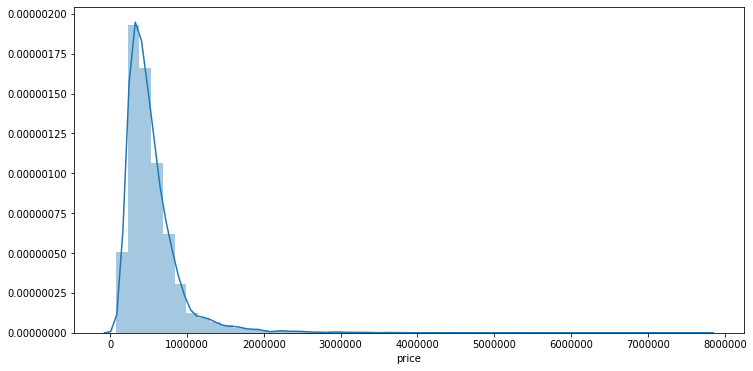

In [10]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'])

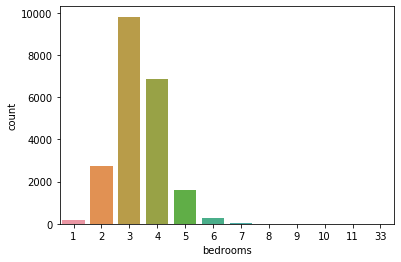

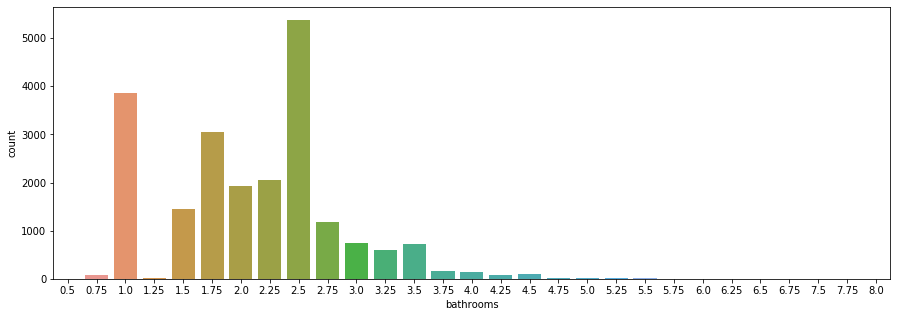

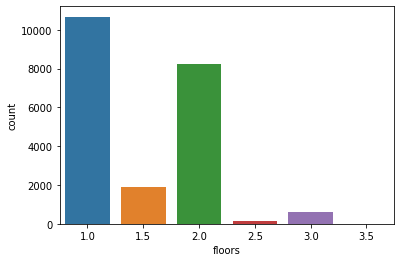

In [11]:
sns.countplot(df['bedrooms'])
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(df['bathrooms'])
plt.show()
sns.countplot(df['floors'])

In [12]:
df.corr()['price']   # highest correlated to price is sqft living.

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

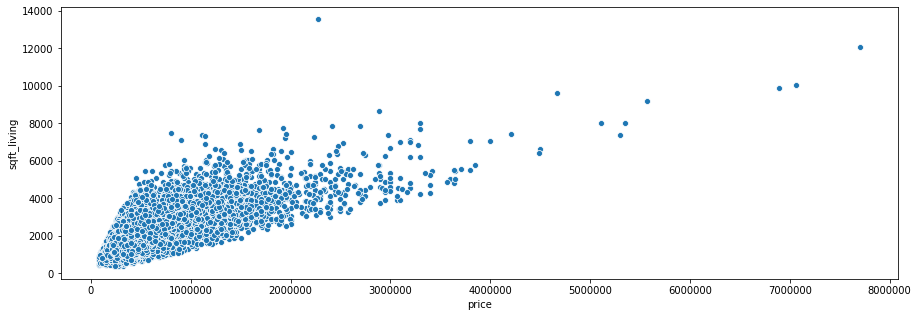

In [13]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['price'],df['sqft_living'])

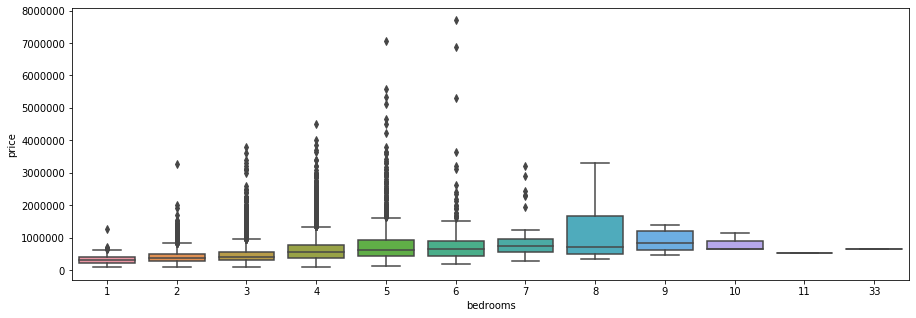

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(df['bedrooms'],df['price'])

In [15]:
import plotly

In [16]:
from plotly import __version__

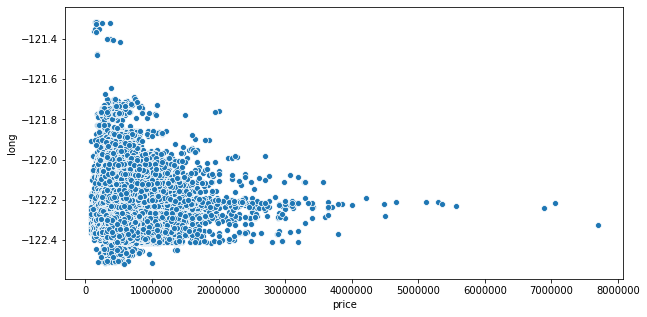

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['price'],df['long'])

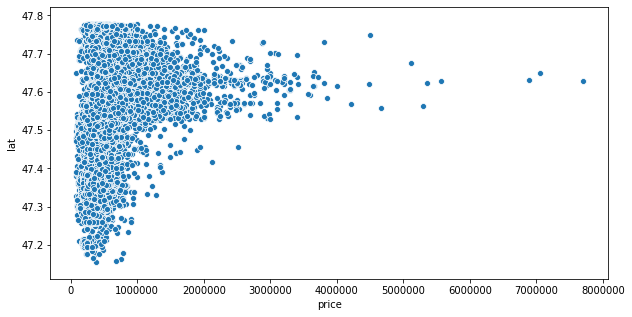

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['price'],df['lat'])

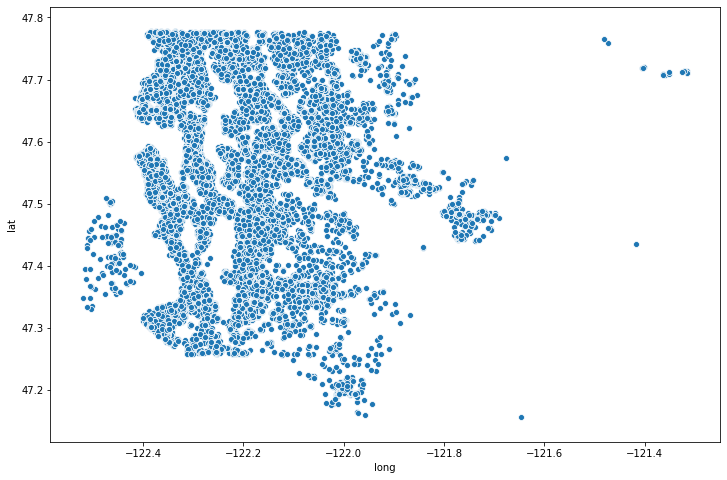

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['long'],df['lat'])

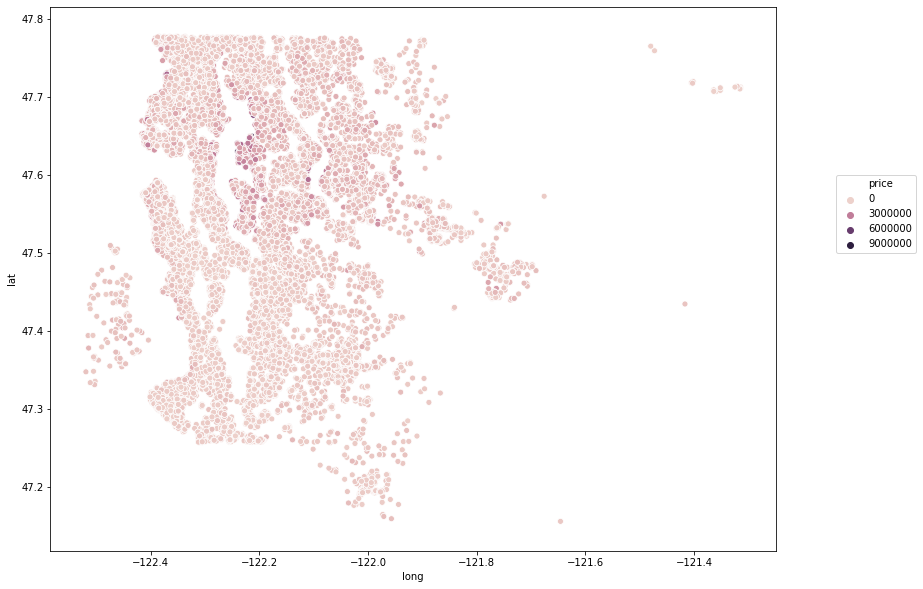

In [20]:
plt.figure(figsize=(13,10))
sns.scatterplot(df['long'],df['lat'],hue=df['price'])
plt.legend(bbox_to_anchor=(0.6,0.3,0.6,0.4))

In [21]:
df.sort_values(by='price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [22]:
non_1_percent = df.sort_values(by='price',ascending=False).iloc[200:]

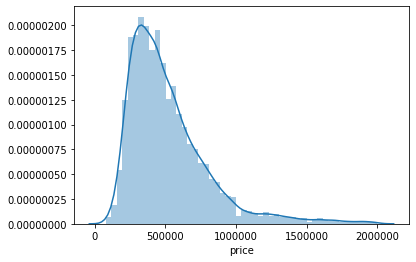

In [23]:
sns.distplot(non_1_percent['price'])

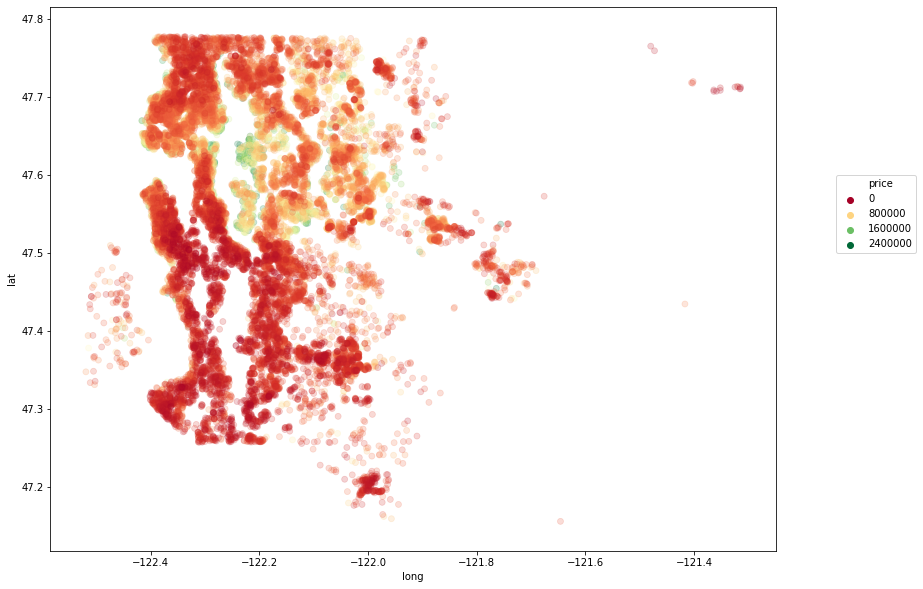

In [24]:
plt.figure(figsize=(13,10))
sns.scatterplot(non_1_percent['long'],non_1_percent['lat'],hue=non_1_percent['price'],edgecolor=None,
                palette='RdYlGn',alpha=0.2)
plt.legend(bbox_to_anchor=(0.6,0.3,0.6,0.4))

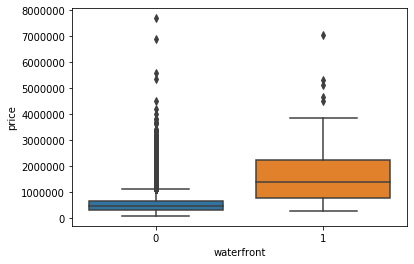

In [25]:
sns.boxplot(df['waterfront'],df['price'])

# Feature engineering

In [26]:
# to remove columns we don't need.

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df.drop('id',axis=1,inplace=True)

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [31]:
df['year'] = df['date'].apply(lambda date : date.year)

In [32]:
df['month']  = df['date'].apply(lambda date : date.month)

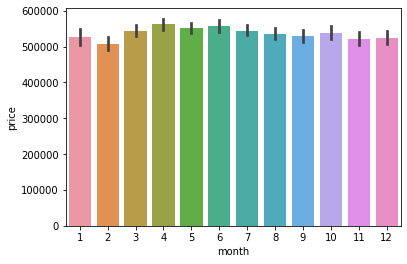

In [33]:
sns.barplot(df['month'],df['price'])

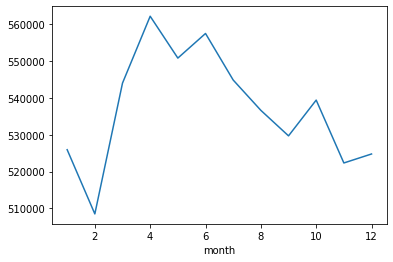

In [34]:
df.groupby(df['month']).mean()['price'].plot()

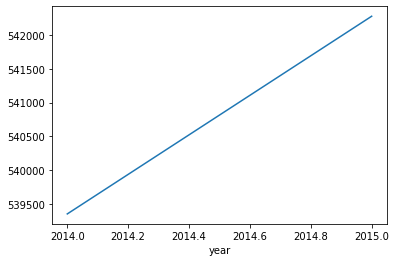

In [35]:
df.groupby('year').mean()['price'].plot()

In [36]:
df.drop('date',axis=1,inplace=True)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [38]:
df.drop('zipcode',axis=1,inplace=True)

# Train Test Data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('price',axis=1).values

In [41]:
y = df['price'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [44]:
minmax = MinMaxScaler()

In [45]:
X_train = minmax.fit_transform(X_train)

In [46]:
X_test = minmax.transform(X_test)  # we don't fit our test data.

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
X_train.shape

(15117, 19)

In [49]:
model = Sequential()

# number of neurons should be equal or should depend on the number of features in the train data.

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [50]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)  

# validation_data = :  after each epoch , it will quickly run the test data and check out loss on the test data.

#    it will keep check on how well model is performing on the test data and train data.

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 3s 185us/sample - loss: 430245808926.0927 - val_loss: 418948306423.1506
Epoch 2/400
15117/15117 [==============================] - 1s 38us/sample - loss: 429602498526.2663 - val_loss: 416700782394.7852
Epoch 3/400
15117/15117 [==============================] - 1s 41us/sample - loss: 420399078824.1095 - val_loss: 395482871631.0123
Epoch 4/400
15117/15117 [==============================] - 1s 43us/sample - loss: 372595704370.4989 - val_loss: 314136781143.8618
Epoch 5/400
15117/15117 [==============================] - 1s 38us/sample - loss: 253724720648.2979 - val_loss: 172149830956.8790
Epoch 6/400
15117/15117 [==============================] - 1s 37us/sample - loss: 131847525763.6663 - val_loss: 99605666545.4617
Epoch 7/400
15117/15117 [==============================] - 1s 42us/sample - loss: 99570785144.3202 - val_loss: 94513172328.2963
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 23us/sample - loss: 33755579756.8047 - val_loss: 32525259692.5630
Epoch 127/400
15117/15117 [==============================] - 0s 24us/sample - loss: 33739375608.9891 - val_loss: 32414788074.5086
Epoch 128/400
15117/15117 [==============================] - 0s 30us/sample - loss: 33709965049.1754 - val_loss: 32391786758.9531
Epoch 129/400
15117/15117 [==============================] - 0s 25us/sample - loss: 33638564109.6662 - val_loss: 32333113409.7383
Epoch 130/400
15117/15117 [==============================] - 0s 26us/sample - loss: 33609977464.5403 - val_loss: 32287215636.2272
Epoch 131/400
15117/15117 [==============================] - 0s 27us/sample - loss: 33567926492.4205 - val_loss: 32244000692.1481
Epoch 132/400
15117/15117 [==============================] - 0s 19us/sample - loss: 33530396471.4946 - val_loss: 32198999148.7210
Epoch 133/400
15117/15117 [==============================] - 0s 21us/sample - loss: 33552900052.6475 - v

15117/15117 [==============================] - 0s 18us/sample - loss: 31072331180.3093 - val_loss: 29226286122.9827
Epoch 253/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31086280366.9342 - val_loss: 29212368193.1062
Epoch 254/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31052407340.5379 - val_loss: 29204079593.2444
Epoch 255/400
15117/15117 [==============================] - 0s 19us/sample - loss: 31015569808.3334 - val_loss: 29166160423.1901
Epoch 256/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31020358590.2261 - val_loss: 29187485787.0222
Epoch 257/400
15117/15117 [==============================] - 0s 16us/sample - loss: 30995254834.4312 - val_loss: 29160776357.6099
Epoch 258/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30989701706.4783 - val_loss: 29156081982.5778
Epoch 259/400
15117/15117 [==============================] - ETA: 0s - loss: 31204326836.148 - 0s 19us/s

Epoch 315/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30347853566.0525 - val_loss: 28456168167.3481
Epoch 316/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30314756210.3423 - val_loss: 28330887461.2938
Epoch 317/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30325429851.0742 - val_loss: 28309913251.0815
Epoch 318/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30377083646.5267 - val_loss: 28295133280.0790
Epoch 319/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30296330742.7537 - val_loss: 28420256204.1679
Epoch 320/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30321132989.6842 - val_loss: 28314472832.3160
Epoch 321/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30267668438.0022 - val_loss: 28278228339.6741
Epoch 322/400
15117/15117 [==============================] - 0s 17us/sample - loss: 302885

Epoch 378/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29661910604.9846 - val_loss: 27463267932.2864
Epoch 379/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29643088476.1580 - val_loss: 27567996189.7086
Epoch 380/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29647083324.5072 - val_loss: 27435001416.0593
Epoch 381/400
15117/15117 [==============================] - 0s 24us/sample - loss: 29615745837.2661 - val_loss: 27536533195.5358
Epoch 382/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29659881392.2043 - val_loss: 27413474387.4370
Epoch 383/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29661849512.4821 - val_loss: 27453848143.6444
Epoch 384/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29642827343.6264 - val_loss: 27387172424.0593
Epoch 385/400
15117/15117 [==============================] - 0s 18us/sample - loss: 296015

In [51]:
losses=pd.DataFrame(model.history.history)

# here we get the val_loss from test data, from this we can compare that are we overfitting data or not.

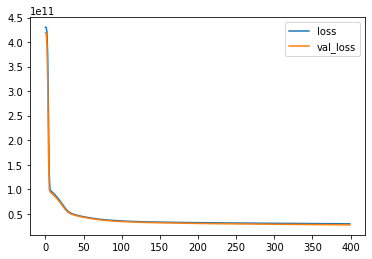

In [52]:
losses.plot()

# therefore we are not overfitting,

# if orange line would start to spike up, then it would have overfitted.

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [54]:
pred = model.predict(X_test)

In [55]:
mean_absolute_error(y_test,pred)

101539.60351321373

In [56]:
mean_squared_error(y_test,pred)

27191809933.91264

In [57]:
mean_squared_error(y_test,pred)**0.5

164899.39337035973

In [58]:
df.describe()['price']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [59]:
print('mean', 5.400881e+05)
print('min' ,7.500000e+04)
print('max' ,7.700000e+06)


# therefore we are 20% off from our actual price , which is not good.

mean 540088.1
min 75000.0
max 7700000.0


In [60]:
explained_variance_score(y_test,pred)   # best explained_variance is 1.

0.7950198227153815

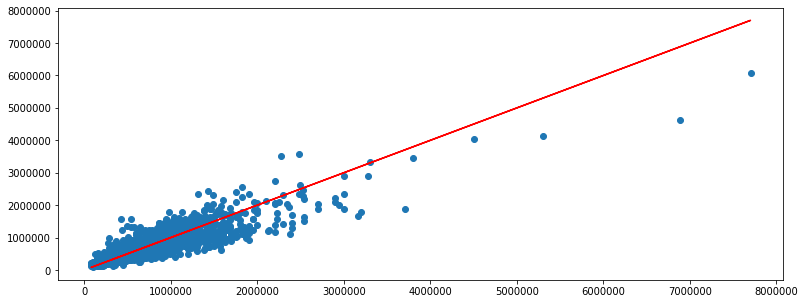

In [61]:
plt.figure(figsize=(13,5))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')


# here , the outliers are not predicted very well, but houses between 0 and 2M are predicted good.

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
# how we will predict price of a new house.

In [64]:
new_house = df.drop('price',axis=1).iloc[0]   
# let's assume that these are the features of the new house.

In [65]:
# 1. Scale this new house data


new_house = minmax.transform(new_house.values.reshape(-1,19))

In [66]:
model.predict(new_house)

array([[289027.94]], dtype=float32)

In [67]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [68]:
# overshooting the predicted price.
# remove top 1-2 % of outliers , re-train model for better predictions.

# CLASSIFICATION TASK WITH TENSORFLOW and 

#  DEALING WITH OVERFITTING

# EARLY STOPPING

In [69]:
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64